In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from google.colab import drive
import random
from sklearn.metrics import accuracy_score
import time
# import sys
np.set_printoptions(threshold=False) # for printing entire array after ohe
plt.style.use('ggplot')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import SquaredHinge
from tensorflow.keras.optimizers import Adam

# Load the training and test data
train_data = pd.read_csv('/content/drive/My Drive/Facial_Recog/facial_recog/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Facial_Recog/facial_recog/test.csv')

# Preprocess the data
X_train = np.array([np.fromstring(pixel_str, dtype=int, sep=' ') for pixel_str in train_data['pixels']])
y_train = np.array(train_data['emotion'])
X_test = np.array([np.fromstring(pixel_str, dtype=int, sep=' ') for pixel_str in test_data['pixels']])

X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)

# Define the model architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model with squared hinge loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model and test
model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split=0.1)

202/202 [==============================] - 610s 3s/step - loss: 2.0474 - accuracy: 0.3004 - val_loss: 1.9914 - val_accuracy: 0.1452


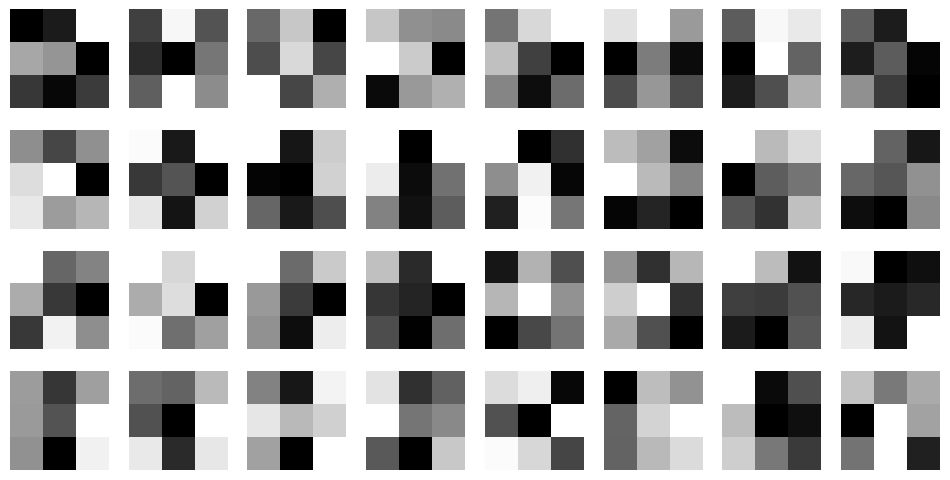

In [ ]:
# 1st layer filters from convolutional net with softmax 

import matplotlib.pyplot as plt

# Get the weights of the first convolutional layer
weights = model.layers[0].get_weights()[0]

# Reshape the weights tensor to the shape of the filters
filters = weights.reshape((32, 3, 3))

# Plot the filters
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(12,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(filters[i], cmap='gray')
    axi.axis('off')
    
plt.show()


In [ ]:
model.save("/content/drive/My Drive/COMP_551/facial_recog_softmax.pth")